**Introduction**

In today’s world, financial institutions and banks increasingly rely on data analysis and machine learning
 algorithms to reduce risk and improve efficiency. One of the major challenges for banks is predicting whether loan applicants will be able to repay their loans.

In this project, using data that includes personal and financial features of loan applicants — such as Gender, Marital Status, Dependents, Education, Self-Employment, Applicant Income, Coapplicant Income, Loan Amount, Loan Term, Credit History, and Property Area — a model has been developed to accurately predict which applicants are likely to repay their loans and which are at risk of default.

The goal of this analysis is to provide an intelligent tool for better decision-making in the loan approval process, helping banks reduce default risk and increase profitability.

**Libraries used**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Reading the dataset**

In [2]:
df=pd.read_csv("loan.csv")

**Exploratory Data Analysis (EDA)**

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


Data types

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Dropping unused columns**

Loan_ID

In [6]:
df.drop(["Loan_ID"],axis=1,inplace=True)

**Data collection**

Number of females and males in the dataset

In [7]:
df["Gender"].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

**Display**

Show the number of females and males

<Axes: ylabel='count'>

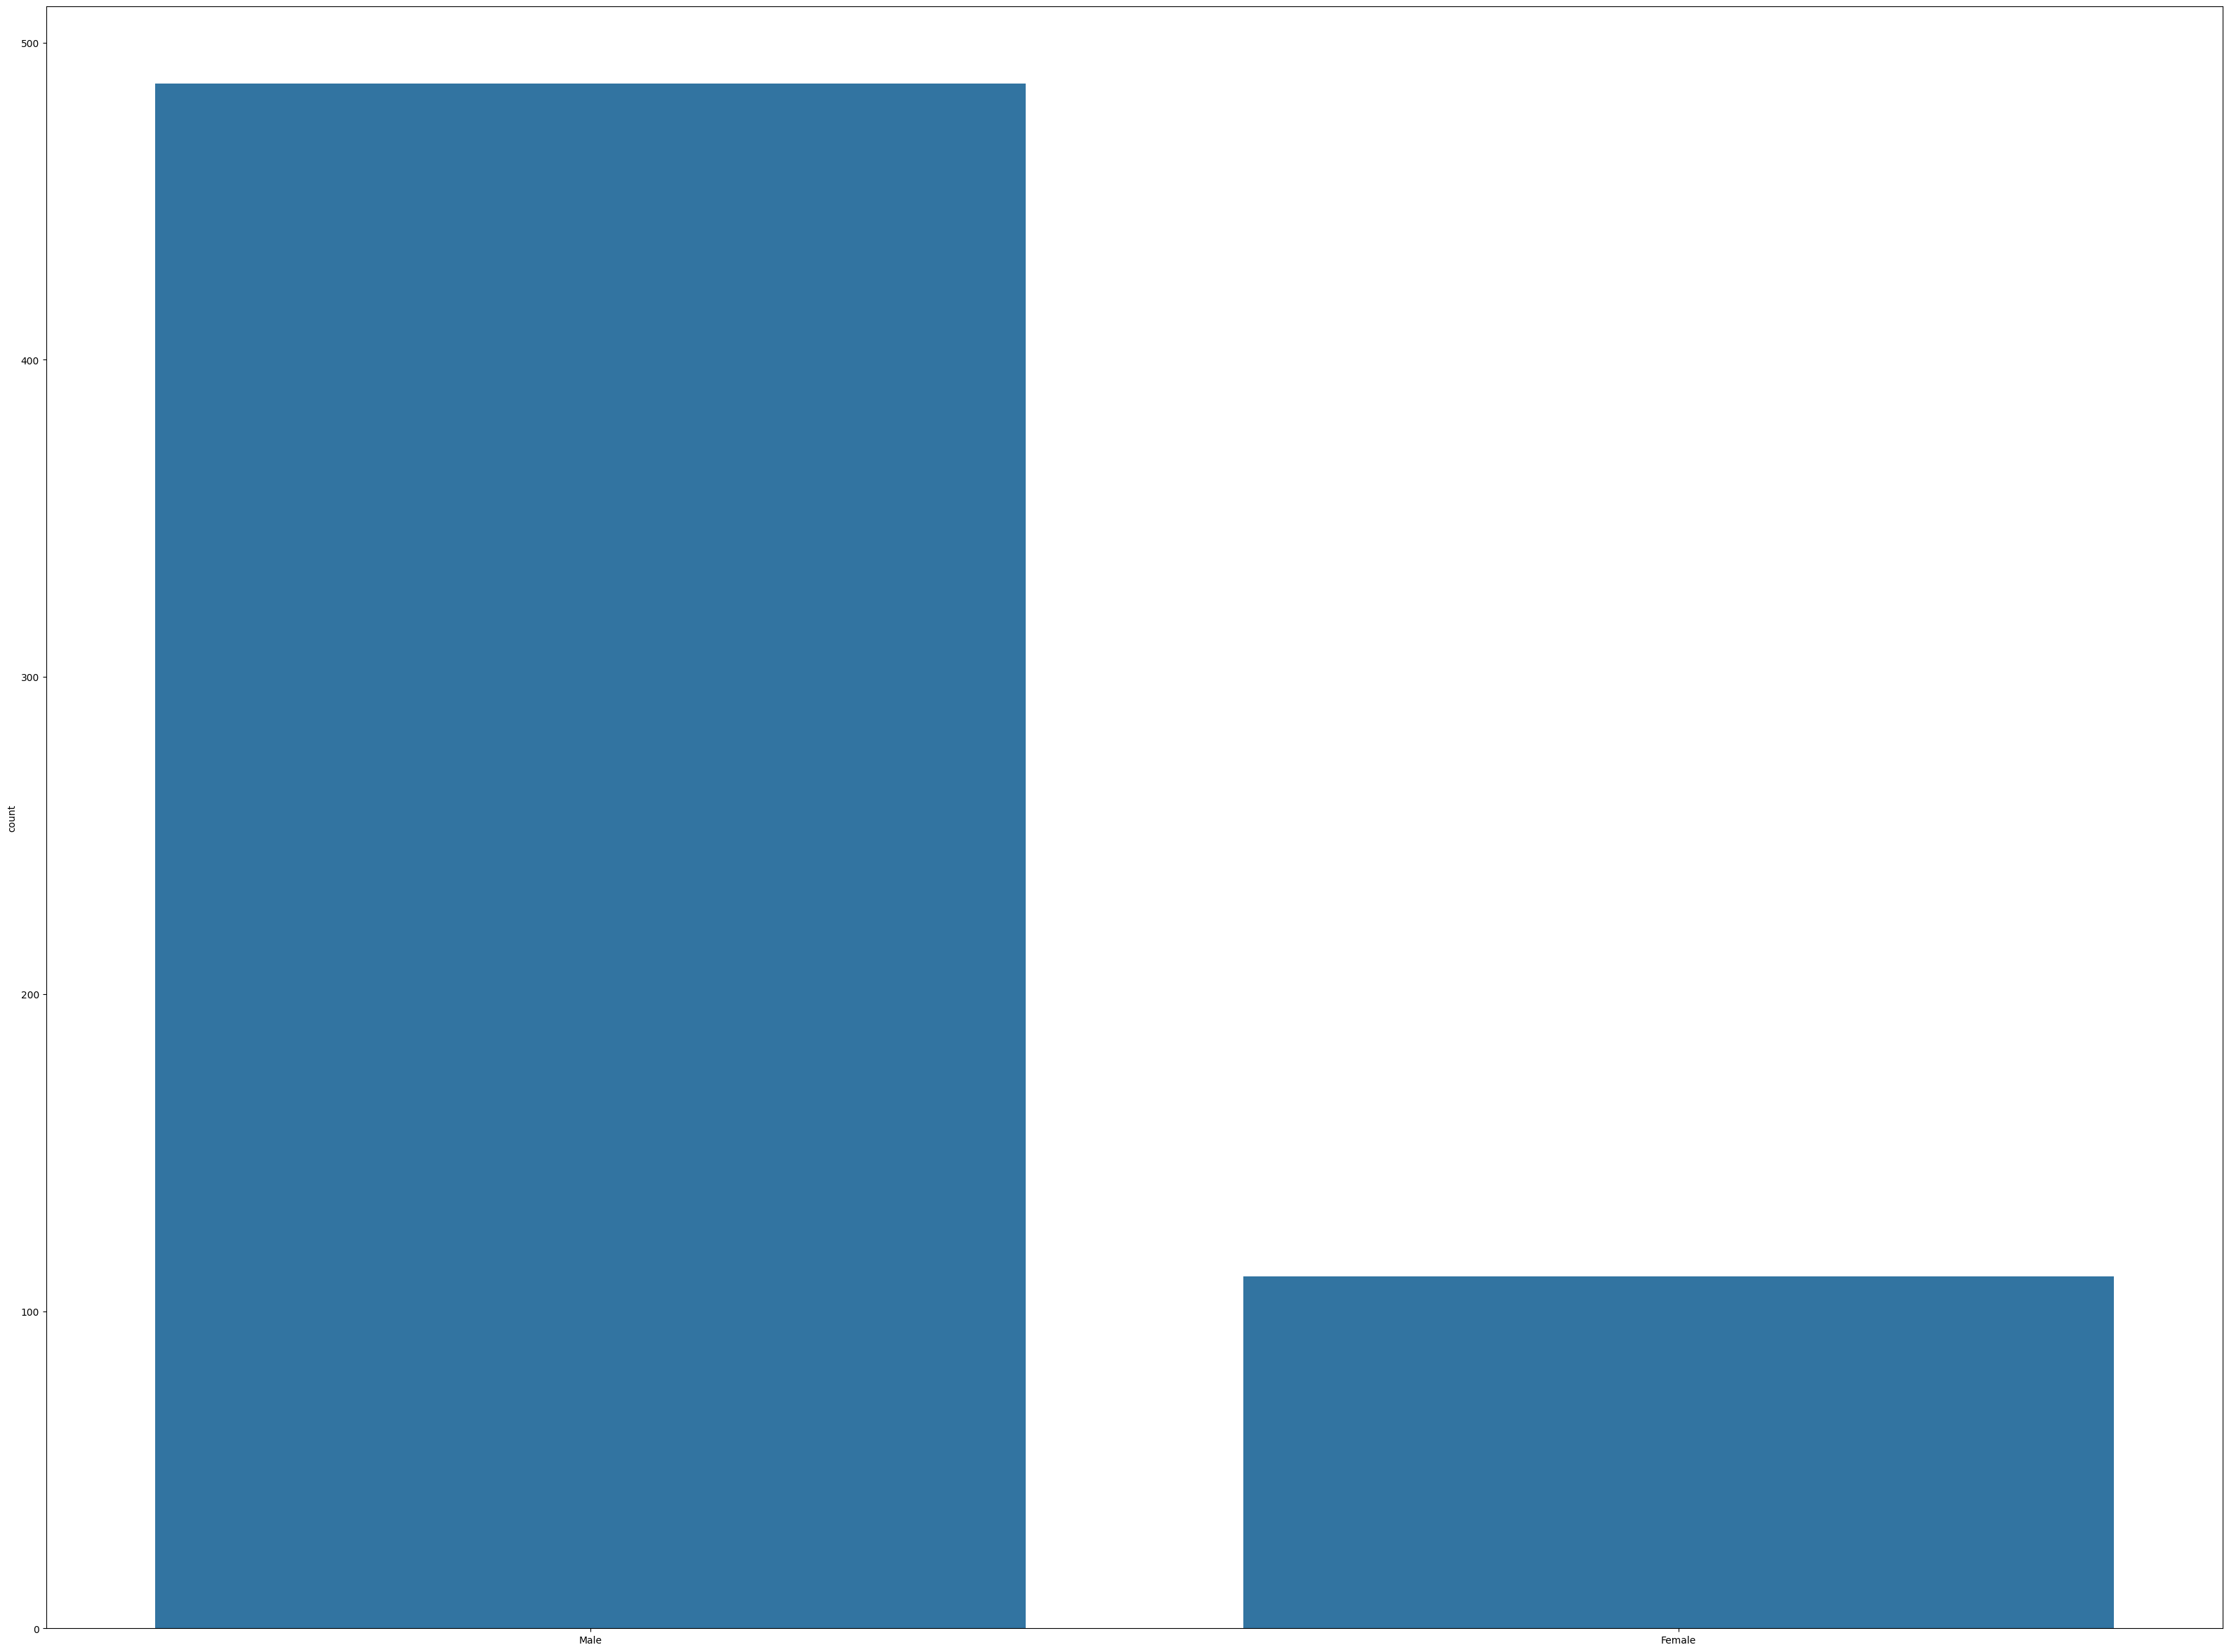

In [8]:
plt.close()
y=df["Gender"].value_counts()
plt.figure(figsize=(40,30))
sns.barplot(x=list(y.index),y=y)

**LabelEncoder**

Encoding object-type data into numeric values

In [9]:
label_encoder=preprocessing.LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Married"]=label_encoder.fit_transform(df["Married"])
df["Education"]=label_encoder.fit_transform(df["Education"])
df["Self_Employed"]=label_encoder.fit_transform(df["Self_Employed"])
df["Property_Area"]=label_encoder.fit_transform(df["Property_Area"])
df["Loan_Status"]=label_encoder.fit_transform(df["Loan_Status"])

**Observing changes in the dataset**

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


**Heatmap**

Visualizing the relationship between data

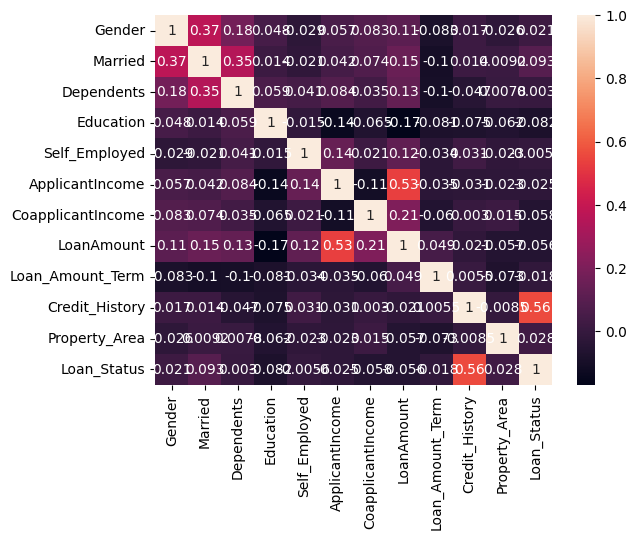

In [11]:
plt.close()
plt.Figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Isnull**

Displaying the number of missing values in each column

In [12]:
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

**Imputing missing values**

In [13]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Body**

Setting X and y values and performing train-test split

In [14]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((568, 11), (30, 11), (568,), (30,))

Testing and selecting the best algorithm for prediction

In [15]:
RobotTest=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
for i in range(3):
    RobotTest[i].max_iter=1000000
    RobotTest[i].fit(X_train,y_train)
    print(f"{RobotTest[i]}:")
    print("Training Accuracy:",sm.roc_auc_score(y_train,RobotTest[i].predict(X_train)))
    print("Testing Accuracy:",sm.roc_auc_score(y_test,RobotTest[i].predict(X_test)))
print()

LogisticRegression(max_iter=1000000):
Training Accuracy: 0.6992144303542962
Testing Accuracy: 0.875
DecisionTreeClassifier():
Training Accuracy: 1.0
Testing Accuracy: 0.6761363636363636
KNeighborsClassifier():
Training Accuracy: 0.6226106188335655
Testing Accuracy: 0.5170454545454546



**Choosing the algorithm and training it on the data**

In [16]:
Robot=LogisticRegression()
Robot.max_iter=1000000
Robot.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000000
,multi_class,'deprecated'


**Prediction**

In [17]:
y_pred=Robot.predict(X_test)

In [18]:
y_test

110    0
287    0
563    1
77     0
181    1
284    1
10     1
468    1
78     1
411    1
55     1
118    1
109    1
586    1
523    1
234    1
30     0
212    1
184    1
86     1
2      1
371    1
533    0
594    1
367    1
316    1
72     0
135    0
554    0
436    1
Name: Loan_Status, dtype: int64

**%**

The percentage of correct predictions by the robot

In [19]:
print(sm.accuracy_score(y_test,y_pred)*100,"%")

93.33333333333333 %


**Conclusion**

In this project, using real loan applicant data and machine learning algorithms, a model was developed to
 accurately predict the ability of applicants to repay their loans. The model analyzes key applicant features such as income, credit history, marital status, and property area to identify patterns that are highly effective for predicting loan default risk.

Implementing such a model in banking systems can lead to:

Reduced loan default risk

Improved decision-making in loan approvals

Time and cost savings in applicant evaluation

Ultimately, this project demonstrates that combining data mining and machine learning can provide a powerful tool for risk management in the banking sector.